# Testing src functions

In [1]:
from src import models, datasets, trainer, analysis
import torch
from torch.utils.data import DataLoader
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [20]:
testrnn = models.RNN(1, 5, 1, 0.1, 50, 'relu', bias=False)

In [13]:
cur_hidden = torch.zeros(5)

In [15]:
hidden = testrnn.forward(torch.ones(1), cur_hidden)

In [18]:
testrnn.ho(hidden)

tensor([-0.0438], grad_fn=<ViewBackward0>)

In [23]:
t = np.arange(0, 20.1, 0.1)
stim_bins = np.where((t>=1)&(t<=(3)))

In [26]:
t[stim_bins]

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ])

In [10]:
testdata = datasets.perceptualClassification(0, 5, 2, 4, size=100)

In [11]:
example = next(iter(DataLoader(testdata, batch_size=10, shuffle=True, num_workers=0)))

[ 3.27392337  5.8134968   7.89544385  9.92849912 13.5550396 ]
[0.81745    0.89179862 0.36510223 0.24265431 0.97402897]
[ 3.71480855  5.7819797   9.2412906  11.59260184 15.31895968]
[0.64971331 0.61132787 0.76907489 0.11988476 0.21658449]
[ 2.76735511  6.76177498 10.72344566 14.09452963 17.39544818]
[0.6540386  0.88859534 0.15556857 0.81014173 0.27537869]
[ 3.77897567  7.6470627  10.36265309 13.50571276 16.14945154]
[0.95610974 0.7566476  0.69086304 0.23772001 0.13516449]
[ 3.6652883   7.23948491  9.7182238  13.47119226 15.58832833]
[0.91852971 0.69225688 0.78013575 0.13444682 0.06011179]
[ 2.39702609  4.57853218  7.73919695 10.33658922 13.68057897]
[0.74604407 0.85164326 0.07980618 0.64219811 0.37684524]
[ 3.90918099  6.90897261  9.75942986 12.99985677 16.99004978]
[0.79896908 0.37957747 0.18401806 0.81172486 0.90309154]
[ 3.46896714  6.8912529  10.75537227 12.98523754 16.44326777]
[0.38717048 0.60588252 0.99247802 0.37096957 0.94545604]
[ 3.77987111  7.42461877 10.38459461 12.84934045

In [12]:
example[0][0][0]

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9740, 0.9740, 0.9740])

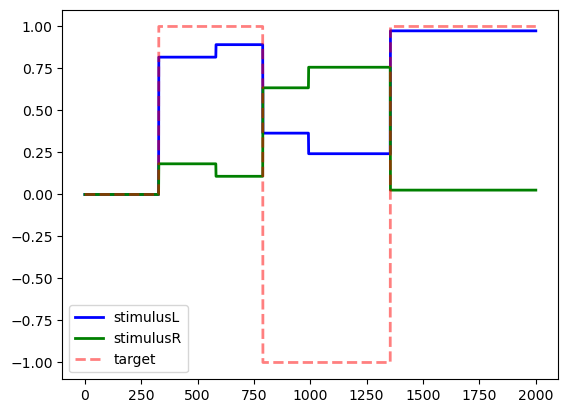

In [15]:
ind =0

plt.plot(example[0][ind][0].numpy(), color='blue', label='stimulusL', linewidth=2)
plt.plot(example[0][ind][1].numpy(), color='green', label='stimulusR', linewidth=2)

plt.plot(example[1][ind].numpy(), color='red', label='target', linewidth=2, alpha=0.5, linestyle='--')

plt.legend()

In [29]:
testrnn.hh.weight

Parameter containing:
tensor([[-2.7093e-01, -3.3656e-04,  1.5870e-01, -8.2846e-02, -2.0841e-01],
        [-4.4533e-01,  3.6139e-01, -4.1310e-01, -3.9851e-01,  1.9130e-01],
        [ 7.7235e-02,  4.1670e-01, -2.1953e-01,  2.9130e-01,  3.5128e-01],
        [ 1.8750e-01, -1.9956e-01, -2.4311e-01,  1.9028e-01, -1.5286e-01],
        [ 2.8113e-01,  3.0368e-01,  3.9393e-01,  3.4493e-04, -2.7769e-02]],
       requires_grad=True)

In [2]:
rnn = torch.load('test_hold_1/best_model.pth')

/var/folders/48/lxr9wxxd4yq06qqj9jrz69780000gt/T/ipykernel_61774/911317418.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  rnn = torch.load('test_hold_1/best_model.pth')

In [ ]:
fitmodel = models.RNN(1,100,1,0.01,1,'relu', sigma_in=0.01)

In [10]:
fitmodel.load_state_dict(rnn)

<All keys matched successfully>

In [8]:
fitmodel.eval()

RNN(
  (ih): Linear(in_features=1, out_features=100, bias=False)
  (hh): Linear(in_features=100, out_features=100, bias=True)
  (ho): Linear(in_features=100, out_features=1, bias=True)
)

In [5]:

with open('test_hold_1/config.yaml', 'r') as file:
        conf = yaml.safe_load(file)

In [6]:
alldata = datasets.decisionMakingHold(1, conf['expt']['stim_start_min'], conf['expt']['stim_start_max'], conf['expt']['stim_length'], conf['expt']['sigma_length'], conf['expt']['duration'], conf['model']['dt'], 100)

In [7]:

plotting_data = next(iter(DataLoader(alldata, batch_size=10, shuffle=True, num_workers=0)))

In [12]:
analysis.plot_example(fitmodel, plotting_data, 'cpu', torch.Generator().manual_seed(1), 'test_hold_1/', noise=False)